In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt,log2

In [13]:
def mod(vec):
    return vec[0]*vec[0] + vec[1]*vec[1]

In [14]:
def compute_next(curr, const):
    zr = curr[0]*curr[0] - curr[1]*curr[1] + const[0]
    zi = 2 * curr[0] * curr[1] + const[1]
    return [zr, zi]

In [15]:
def compute_points(start, const, num_points):
    points = []
    nxt = start
    itr = 0
    while (mod(nxt)<4.0 and itr<num_points):
        points.append(nxt)
        nxt = compute_next(nxt, const)
        itr+=1
    return [points, itr]

In [67]:
def compute_points_smooth(start, const, num_points):
    points = []
    nxt = start
    itr = 0
    while (mod(nxt)<4.0 and itr<num_points):
        points.append(nxt)
        nxt = compute_next(nxt, const)
        itr+=1
    md = mod(nxt)
    itr = itr - log2(max(1.0, log2(md)))
    return [points, itr]

In [68]:
def render(ivec, const, numPoints,isSmooth=False):
    scale = 1.0/(ivec[1]/2)
    pixs = []
    if not isSmooth:
        for y in range(ivec[1]):
            for x in range(ivec[0]):
                px = (x - ivec[0]/2)*scale
                py = (y - ivec[1]/2)*scale
                col = compute_points([px,py], const=const, num_points=numPoints)[1]
                pixs.append([x,y,col])
    else:
        for y in range(ivec[1]):
            for x in range(ivec[0]):
                px = (x - ivec[0]/2)*scale
                py = (y - ivec[1]/2)*scale
                col = compute_points_smooth([px,py], const=const, num_points=numPoints)[1]
                pixs.append([x,y,col])

    return pixs

In [74]:
def generate_heatmap(pixel_locations, frequencies , resolution):
    heatmap = np.zeros(resolution)
    for loc, freq in zip(pixel_locations, frequencies):
        x, y = loc
        heatmap[y, x] = freq  # Assuming (0, 0) is at the top-left corner
    return heatmap

In [79]:
ivec = [720,720]
const = [-0.15,0.77]
numPoints = 50
pix = render(ivec=ivec, const=const, numPoints=numPoints, isSmooth=True)

In [80]:
df = pd.DataFrame(pix, columns=['x', 'y', 'itr'])
x = df['x'].to_list()
y = df['y'].to_list()
itr = df['itr'].to_list()
loc = zip(x,y)

In [81]:
heatmap_data = generate_heatmap(loc, itr, ivec)

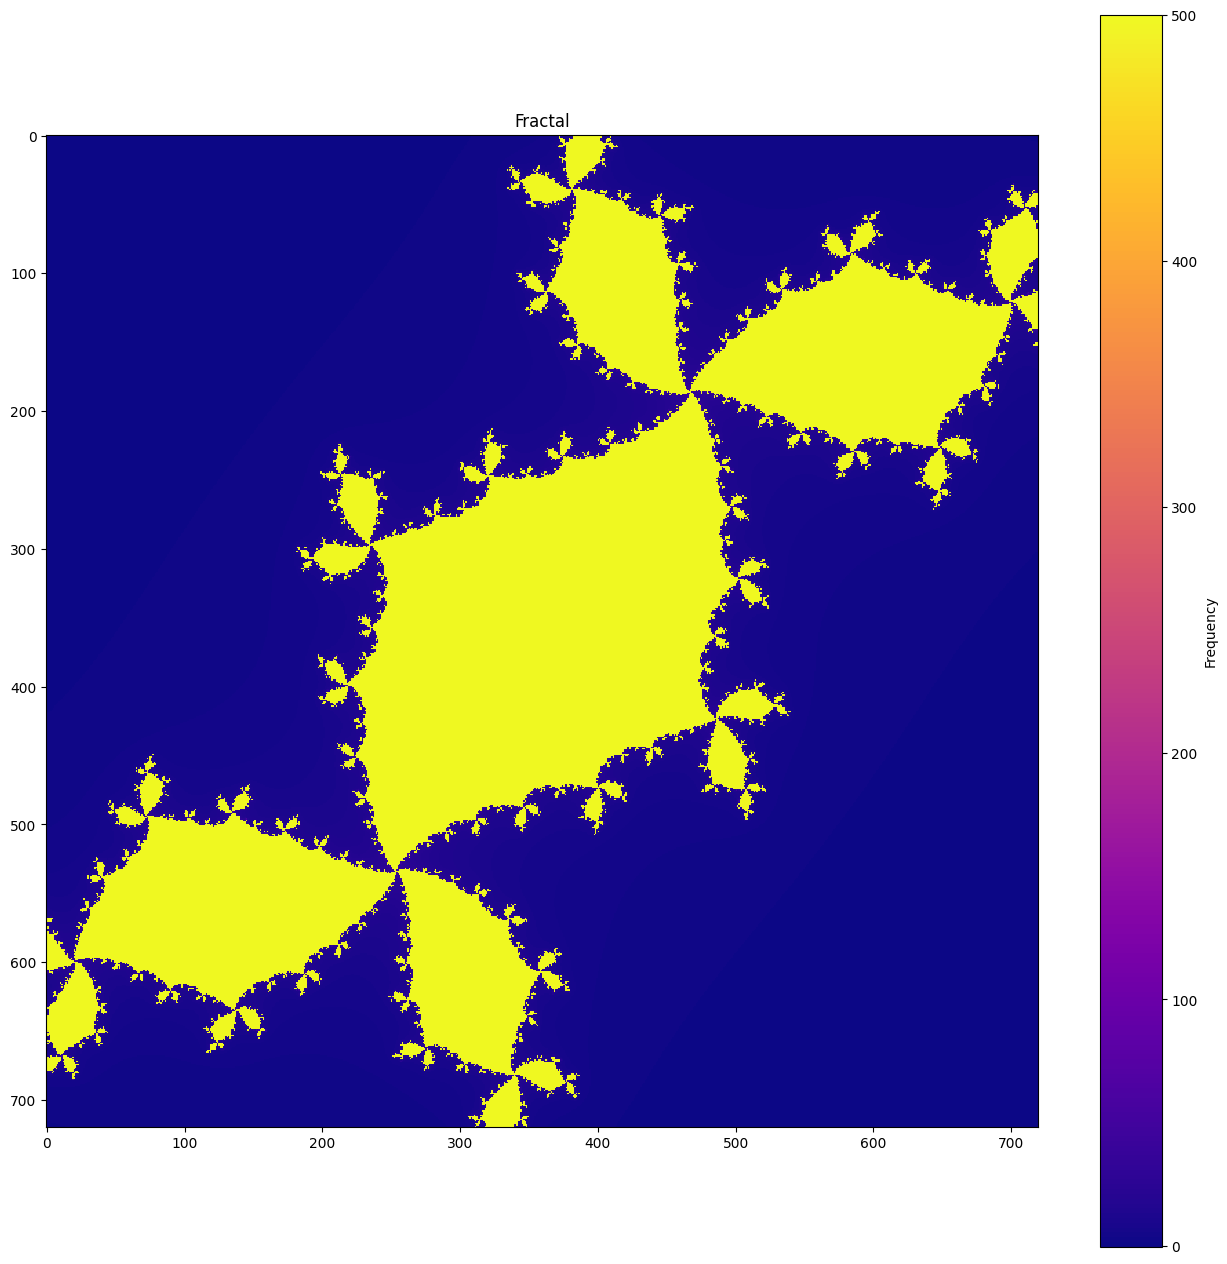

In [82]:
plt.figure(figsize=(16,16))
plt.imshow(heatmap_data, cmap='plasma', interpolation='nearest')
plt.colorbar(label='Frequency')
plt.title('Fractal')
plt.show()

In [86]:
ivec = [720, 720]
const = [-0.74,0.26]
numPoints = 50
pix = render(ivec=ivec, const=const, numPoints=numPoints, isSmooth=True)
df = pd.DataFrame(pix, columns=['x', 'y', 'itr'])
x = df['x'].to_list()
y = df['y'].to_list()
itr = df['itr'].to_list()
loc = zip(x,y)

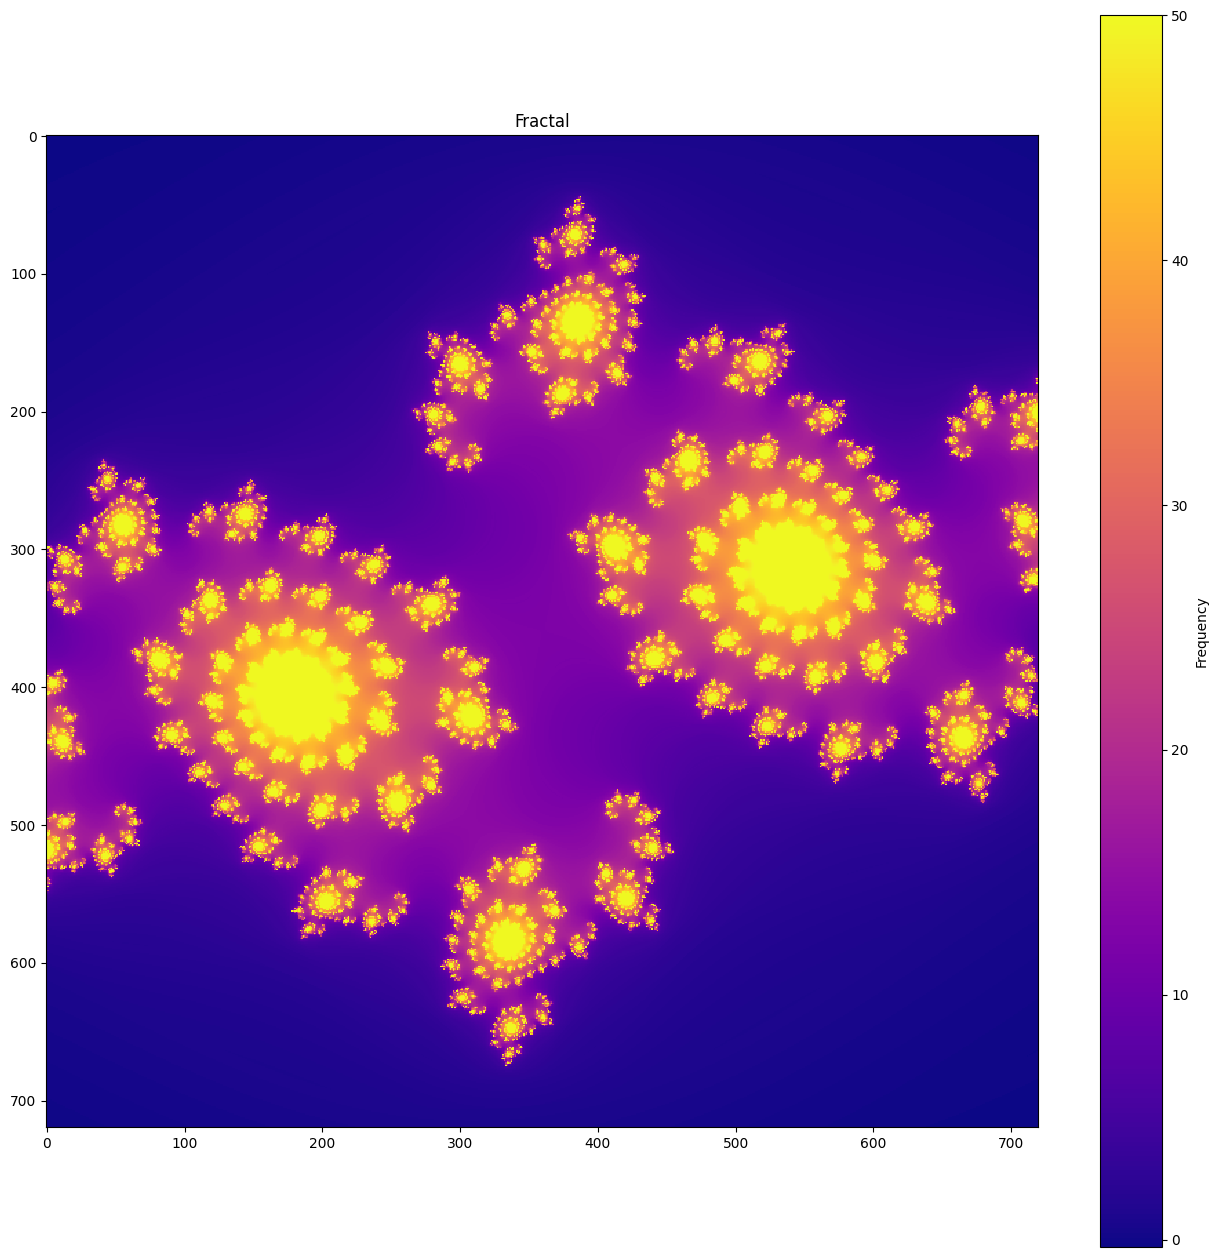

In [87]:
heatmap_data = generate_heatmap(loc, itr, ivec)
plt.figure(figsize=(16,16))
plt.imshow(heatmap_data, cmap='plasma', interpolation='nearest')
plt.colorbar(label='Frequency')
plt.title('Fractal')
plt.show()